In [1]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import torchtext
from sklearn.model_selection import train_test_split
from torchtext import data
from torchtext import datasets
import torch

In [2]:
d=[]
with open('data/reviews.json') as f:
    for line in f:
        d.append(json.loads(line))


In [3]:
reviews=[i['reviewText'].lower() for i in d]
label=[i['overall'] for i in d]
#reviewerID=[i['reviewerID'] for i in data]

In [4]:
columns={'text':reviews,'label':label}
df=pd.DataFrame(data=columns)
df.head()

,text,label
0,spiritually and mentally inspiring! a book tha...,5.0
1,this is one my must have books. it is a master...,5.0
2,this book provides a reflection that you can a...,5.0
3,i first read the prophet in college back in th...,5.0
4,a timeless classic. it is a very demanding an...,5.0


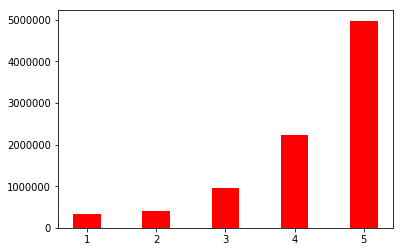

In [5]:
h1=df[df['label']==1].shape[0]
h2=df[df['label']==2].shape[0]
h3=df[df['label']==3].shape[0]
h4=df[df['label']==4].shape[0]
h5=df[df['label']==5].shape[0]
plt.bar(x=[1,2,3,4,5],height=[h1,h2,h3,h4,h5],width=0.4,color='red')
plt.show()

In [6]:
df=df[df['label']!=3]

In [7]:
(df[df['label']==1].count()+ df[df['label']==2].count())/df.count()

text     0.093032
label    0.093032
dtype: float64

In [8]:
df.describe()

,label
count,7.942852e+06
mean,4.400246e+00
std,1.021208e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [9]:
df['label'].replace(1,0,inplace=True)
df['label'].replace(2,0,inplace=True)
df['label'].replace(4,1,inplace=True)
df['label'].replace(5,1,inplace=True)
df['label'].unique()

array([1., 0.])

In [10]:
df.describe()

,label
count,7.942852e+06
mean,9.069675e-01
std,2.904779e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


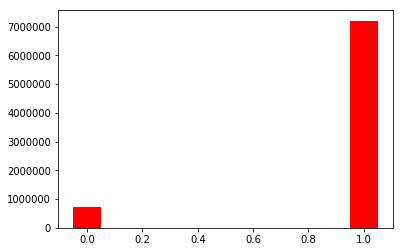

In [11]:
h1=df[df['label']==0].shape[0]
h2=df[df['label']==1].shape[0]
plt.bar(x=[0,1],height=[h1,h2],width=0.1,color='red')
plt.show()

In [12]:
df_pos=df[df['label']==1]
df_neg=df[df['label']==0]
df_pos=df_pos.sample(df_neg.shape[0],random_state=0)
dataframe=pd.concat([df_pos,df_neg])
dataframe=dataframe.reset_index(drop=True)

In [13]:
train,test=train_test_split(dataframe,test_size=0.2,random_state=0)
#train1,train2=train_test_split(train1,test_size=0.2,random_state=0)
#train3,train4=train_test_split(train2,test_size=0.2,random_state=0)
#train,test=train_test_split(dataframe,test_size=0.2,random_state=0)

In [14]:
#train.to_csv('data/train.csv')
#test.to_csv('data/test.csv')

In [15]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [16]:
text_field=data.Field()
label_field=data.LabelField(dtype=torch.float)
fields = [('text',text_field),('label',label_field),(None, None)]

In [17]:
class PredictSentimentDataset(torchtext.data.Dataset):
    def __init__(self, dataframe, TEXT, LABEL, **kwargs):
        fields = [("text", TEXT), ("label", LABEL),(None, None)]
        examples = []
        for i in range(dataframe.values[:,1].shape[0]):
            text = dataframe.text[i] 
            label = dataframe.label[i]
            examples.append(data.Example.fromlist([text, label], fields))
        super().__init__(examples, fields, **kwargs)

    @staticmethod
    def sort_key(ex): return len(ex.Description)
    
    @classmethod
    def splits(cls, text_field, label_field, root='data',
               train='train', test='test', **kwargs):
        return super().splits(
            root, text_field=text_field, label_field=label_field,
            train=train, validation=None, test=test, **kwargs)

In [ ]:
train=PredictSentimentDataset(train,text_field,label_field)
#test=PredictSentimentDataset(test,text_field,label_field)

In [ ]:
train_data, valid_data = train.split(split_ratio=0.85,random_state=0)

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test)}')

In [ ]:
text_field.build_vocab(train_data)
label_field.build_vocab(train_data)
print(f"Unique tokens in TEXT vocabulary: {len(text_field.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(label_field.vocab)}")